In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.Age.fillna(round(df['Age'].mean()),inplace=True)

In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
df.sample(6)

,Survived,Age,Fare
565,0,24.0,24.1500
425,0,30.0,7.2500
378,0,20.0,4.0125
388,0,30.0,7.7292
140,0,30.0,15.2458
604,1,35.0,26.5500


In [7]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42)

In [8]:
X_train

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750
...,...,...
106,21.0,7.6500
270,30.0,31.0000
860,41.0,14.1083
435,14.0,120.0000


C:\Users\Nihar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


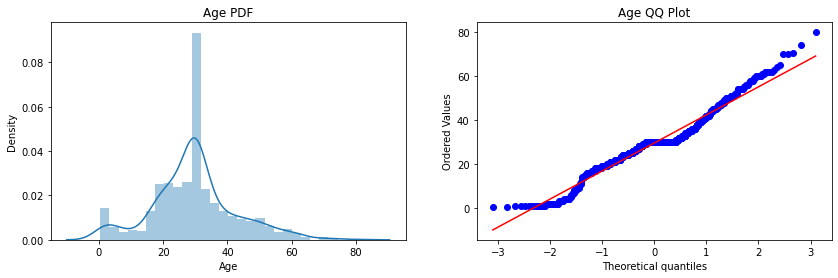

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train.Age,dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\Nihar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


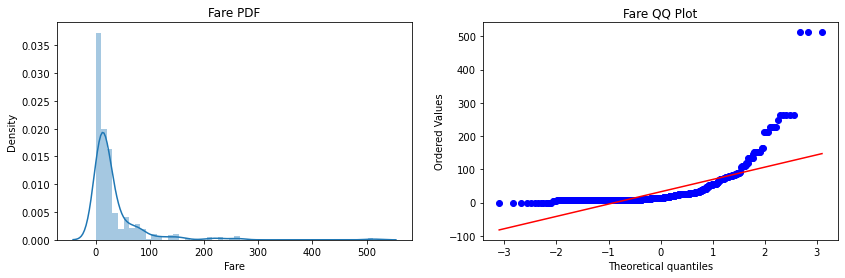

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train.Fare,dist='norm',plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [11]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [12]:
clf.fit(X_train,y_train)
clf1.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)

In [14]:
print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.664804469273743


In [15]:
trf = FunctionTransformer(func=np.log1p)

In [16]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [17]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf1.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf1.predict(X_test_transformed)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6759776536312849


In [18]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf1,X_transformed,y,scoring='accuracy' ,cv=10)))


LR 0.678027465667915
DT 0.6565792759051186


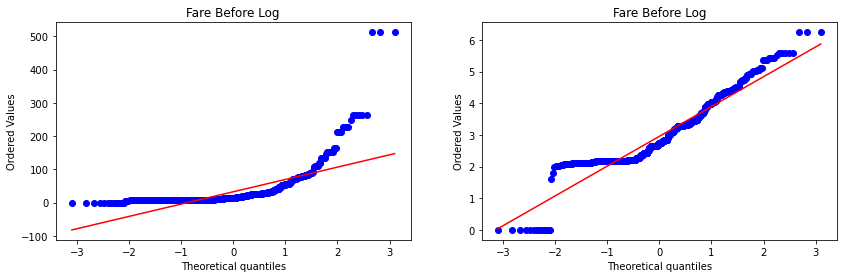

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train.Fare,dist='norm',plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed.Fare,dist='norm',plot=plt)
plt.title('Fare Before Log')

plt.show()

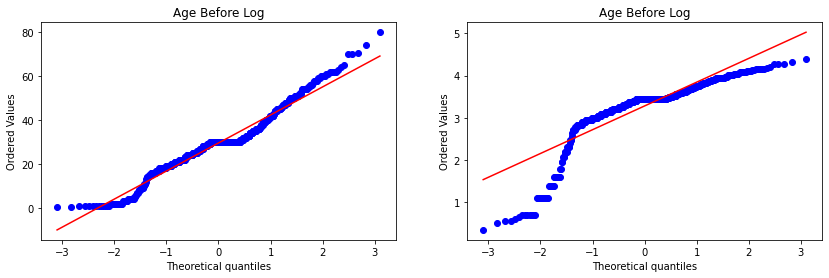

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train.Age,dist='norm',plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed.Age,dist='norm',plot=plt)
plt.title('Age Before Log')

plt.show()

In [21]:
trf1 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

In [22]:
X_train_transformed1 = trf1.fit_transform(X_train)
X_test_transformed1 = trf1.transform(X_test)

In [23]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(X_train_transformed1,y_train)
clf1.fit(X_train_transformed1,y_train)

y_pred = clf.predict(X_test_transformed1)
y_pred1 = clf1.predict(X_test_transformed1)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6703910614525139
Accuracy DT 0.664804469273743


In [24]:
X_transformed1 = trf1.fit_transform(X)

clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed1,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf1,X_transformed1,y,scoring='accuracy' ,cv=10)))

LR 0.6712609238451936
DT 0.6644319600499375


In [25]:
X

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,30.0,23.4500
889,26.0,30.0000


In [26]:
X_transformed1 

array([[ 2.1102132 , 22.        ],
       [ 4.28059312, 38.        ],
       [ 2.18885633, 26.        ],
       ...,
       [ 3.19663022, 30.        ],
       [ 3.4339872 , 26.        ],
       [ 2.1690537 , 32.        ]])

In [27]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_transformed = trf.fit_transform(X)

    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X.Fare,dist='norm',plot=plt)
    plt.title('Fare Before Transform')
    plt.subplot(122)
    stats.probplot(X_transformed[:,0],dist='norm',plot=plt)
    plt.title('Fare Before transform')

    plt.show()

In [28]:

import time
 
count_seconds = 3
for i in reversed(range(count_seconds + 1)):
    if i > 0:
        print(i, end='>>>')
        time.sleep(1)
    else:
        print('Start')

3>>>2>>>1>>>Start


Accuracy 0.6589013732833957


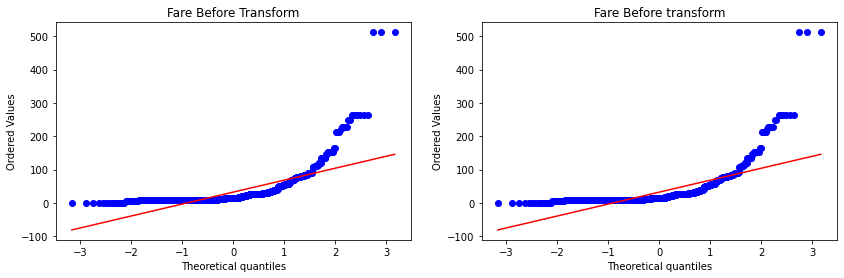

In [29]:
apply_transform(lambda x: x)

Accuracy 0.6442446941323345


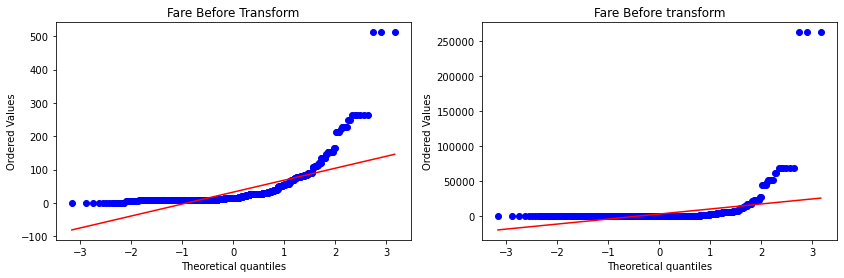

In [30]:
apply_transform(np.square)

Accuracy 0.39843945068664166


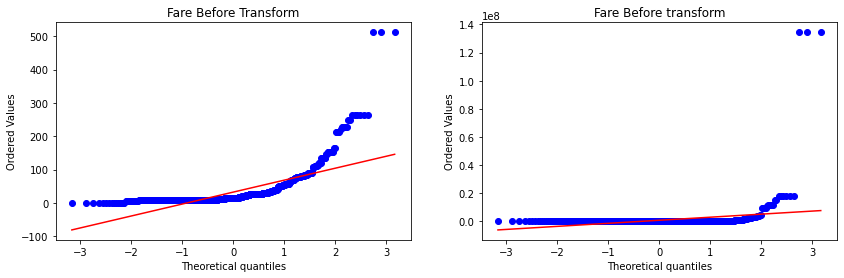

In [31]:
apply_transform(lambda x: x**3)

Accuracy 0.6600249687890136


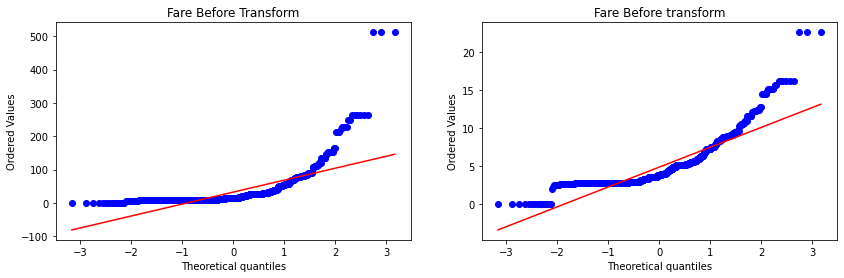

In [32]:
apply_transform(lambda x: x**0.5)

Accuracy 0.61729088639201


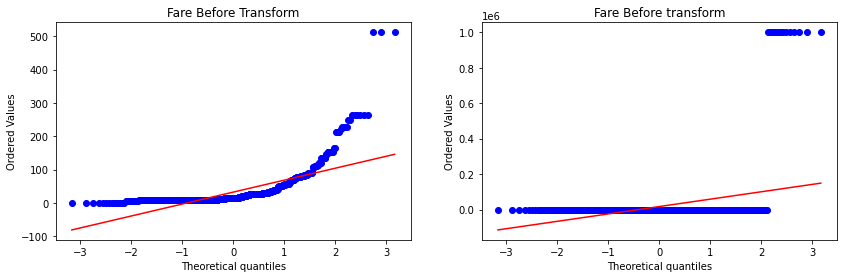

In [33]:
apply_transform(lambda x: 1/(x+0.000001))

Accuracy 0.6195131086142323


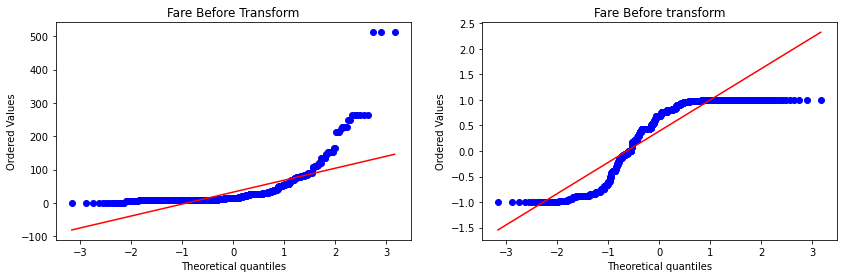

In [34]:
apply_transform(np.sin)

Accuracy 0.6589013732833957


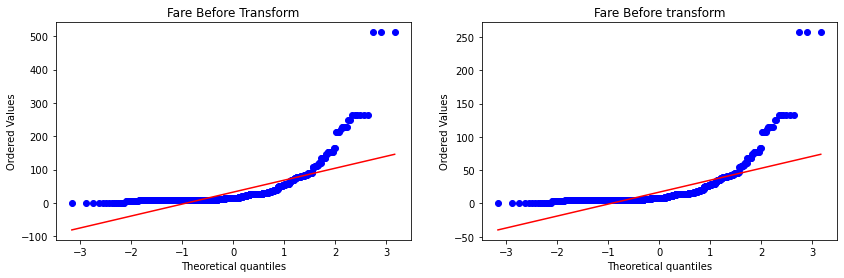

In [35]:
apply_transform(lambda x: (0.5*x+1))